In [1]:
import matplotlib.pyplot as plt
import torch


In [5]:
import pickle
with open('/ai2es/val_probs.pickle', 'rb') as handle:
    p = pickle.load(handle)
with open('/ai2es/val_uncertainties.pickle', 'rb') as handle:
    u = pickle.load(handle)

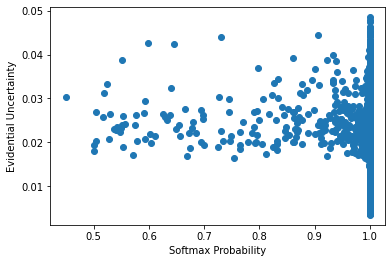

In [11]:
_, ax = plt.subplots()
ax.scatter(
    [torch.Tensor(t).cpu().numpy() for t in p][0],
    [torch.Tensor(t).cpu().numpy() for t in u][0],
)
# ax.set_ylim([0.0,1.0])
# ax.set_xlim([0.5, 1.0])
ax.set_xlabel("Softmax Probability")
ax.set_ylabel("Evidential Uncertainty")
plt.savefig("/ai2es/plots/uncertainty_probability_scatter.png")
plt.show()

(array([ 370.,  884., 1378., 2961., 2660., 1164.,  455.,  151.,   56.,
          16.]),
 array([0.00342385, 0.00793433, 0.01244482, 0.01695531, 0.0214658 ,
        0.02597629, 0.03048677, 0.03499726, 0.03950775, 0.04401824,
        0.04852873], dtype=float32),
 <BarContainer object of 10 artists>)

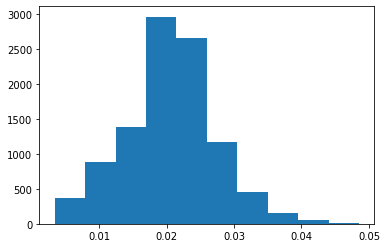

In [7]:
plt.hist([torch.Tensor(t).cpu().numpy() for t in u][0],)

(array([3.000e+00, 1.700e+01, 1.100e+01, 1.100e+01, 1.100e+01, 1.400e+01,
        2.200e+01, 2.800e+01, 4.400e+01, 9.934e+03]),
 array([0.4488415, 0.5039574, 0.5590732, 0.614189 , 0.6693049, 0.7244208,
        0.7795366, 0.8346524, 0.8897683, 0.9448842, 1.       ],
       dtype=float32),
 <BarContainer object of 10 artists>)

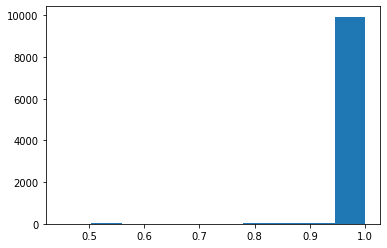

In [8]:
plt.hist([torch.Tensor(t).cpu().numpy() for t in p][0])

In [21]:
[torch.Tensor(t).cpu().numpy() for t in u]

0.048528727

In [52]:

annealing_step = 50
epoch_num= 50
annealing_coef = torch.min(
        torch.tensor(1.0, dtype=torch.float32),
        torch.tensor(epoch_num / annealing_step, dtype=torch.float32),
    )

In [53]:
annealing_coef

tensor(0.8000)